## Stress Predicton

We will create models to predict stress level using data collected from a survey.


https://www.kaggle.com/datasets/csepython/stress-detection-it-professionals-dataset

The dataset contains 1,000 entries and 6 columns, which are described below:

Columns:
Heart_Rate: Heart rate (in beats per minute).

Skin_Conductivity: Skin conductivity (in microsiemens, µS), indicating stress levels or arousal- Skin conductance, also known as Galvanic Skin Response (GSR) or Electrodermal Activity (EDA), is a measurement of the skin's electrical conductivity that can be used to assess stress levels

Hours_Worked: Number of hours worked on a given day.

Stress_Level: Subjective stress level (numerical scale, likely self-reported). - Perceived Stress Scale (PSS)

Emails_Sent: Number of emails sent by the individual in a day.

Meetings_Attended: Number of meetings attended by the individual in a day.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Model selection and model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Evaluation Metrics
from sklearn.metrics import mean_squared_error     
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

## Import you data and perform basic data exploration phase

In [4]:
df = pd.read_csv('stress_detection_IT_professionals_dataset.csv')
df.head()


,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
0,87,5.56,5,28,31,6
1,74,5.89,5,25,42,3
2,79,4.58,9,26,28,4
3,92,5.10,7,30,37,3
4,88,5.23,8,29,35,6


In [5]:
#  Display general information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Heart_Rate         1000 non-null   int64  
 1   Skin_Conductivity  1000 non-null   float64
 2   Hours_Worked       1000 non-null   int64  
 3   Stress_Level       1000 non-null   int64  
 4   Emails_Sent        1000 non-null   int64  
 5   Meetings_Attended  1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [6]:
## Check for missing values
df.isnull().sum()

Heart_Rate           0
Skin_Conductivity    0
Hours_Worked         0
Stress_Level         0
Emails_Sent          0
Meetings_Attended    0
dtype: int64

In [7]:
#  Create a pandas profiling reports to gain insights into the dataset
## import profilereport libraries

#from ydata_profiling import ProfileReport

In [8]:
### Generate the report

#profile = ProfileReport(df, title = "Stress Prediction Report")

In [9]:
### To generate the profilereport in an HTML file

#profile.to_file("Stress Prediction Report.html")

In [10]:
# Displaying # Summary statistics for the dataset

df.describe()

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,69.037000,5.013660,8.386000,23.354000,29.79200,2.959000
std,9.870717,0.968644,1.932547,2.595654,5.58085,1.720546
min,39.000000,2.010000,2.000000,16.000000,13.00000,0.000000
25%,62.750000,4.347500,7.000000,22.000000,26.00000,2.000000
50%,69.000000,5.030000,8.000000,23.000000,30.00000,3.000000
75%,76.000000,5.630000,10.000000,25.000000,33.00000,4.000000
max,97.000000,8.170000,14.000000,31.000000,49.00000,9.000000


In [11]:
## Check for duplicates
df.duplicated().sum()

0

### Data Visualization

In [13]:
# Setting the visual style
sns.set_theme(style="whitegrid")

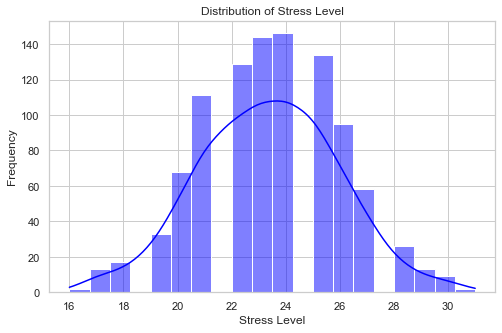

In [14]:
# Distribution of Stress Level
plt.figure(figsize=(8, 5))
sns.histplot(df['Stress_Level'], kde=True, bins=20, color='blue')
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

The graph is a **histogram with a KDE (Kernel Density Estimation) curve** showing the distribution of **Stress Level** values. Here's an explanation of the results:

### Key Observations:
1. **Symmetry**: 
   - The distribution appears approximately **bell-shaped**, suggesting the data might be **normally distributed**. 
   - Most of the stress levels are concentrated near the middle of the range, indicating a central tendency.

2. **Peak Frequency**:
   - The highest bar corresponds to stress levels around **23-25**, which is the mode (most common value range).

3. **Spread**:
   - Stress levels range from approximately **16** (minimum) to **30** (maximum).
   - This indicates that while most individuals have moderate stress levels, a few have either very low or very high stress.

4. **KDE Curve**:
   - The smooth curve overlaid on the histogram provides an estimate of the probability density function of the stress levels.
   - It shows the underlying trend, emphasizing the peak around the mean and tapering off at both ends.

5. **Skewness**:
   - The distribution seems fairly symmetrical with no significant skew, implying that the stress levels are evenly distributed around the mean.

### Implications:
This distribution suggests that most individuals have stress levels near the average, with fewer outliers on either side. This insight could be useful for identifying "normal" stress levels among the population and spotting individuals with unusually high or low stress for further analysis or intervention.


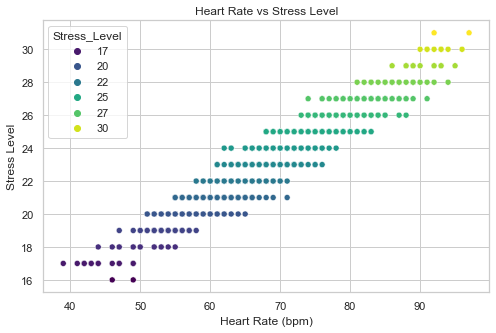

In [15]:
# Relationship between Heart Rate and Stress Level
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Heart_Rate', y='Stress_Level', data=df, hue='Stress_Level', palette='viridis')
plt.title('Heart Rate vs Stress Level')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Stress Level')
plt.show()

The scatterplot illustrates the relationship between **Heart Rate (bpm)** and **Stress Level**:

### Key Observations:
1. **Positive Correlation**:
   - There is a clear **positive relationship** between heart rate and stress level. As heart rate increases, stress level also rises.

2. **Linear Trend**:
   - The points form an almost **linear pattern**, indicating that higher heart rates are strongly associated with higher stress levels.

3. **Gradient Representation**:
   - The color gradient represents different stress levels (ranging from 17 to 30), with darker colors for lower stress levels and brighter colors for higher stress levels.

### Conclusion:
Heart rate is a good indicator of stress, as higher heart rates are consistently linked to increased stress levels.

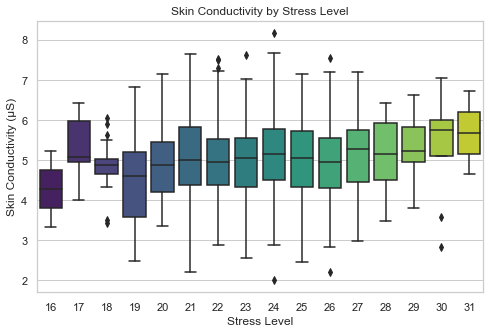

In [16]:
# Skin Conductivity vs Stress Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Stress_Level', y='Skin_Conductivity', data=df, palette='viridis')
plt.title('Skin Conductivity by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Skin Conductivity (µS)')
plt.show()

The graph shows the relationship between skin conductivity and stress level. As the stress level increases, the skin conductivity also tends to increase. This is likely due to increased sweat production, which increases the electrical conductivity of the skin.

The box plots show the distribution of skin conductivity values for each stress level. The box represents the interquartile range (IQR), which contains 50% of the data. The whiskers extend to the minimum and maximum values, excluding outliers. Outliers are represented by individual points.

The graph suggests that skin conductivity can be a useful biomarker for stress level. However, it is important to note that other factors, such as temperature and humidity, can also affect skin conductivity.

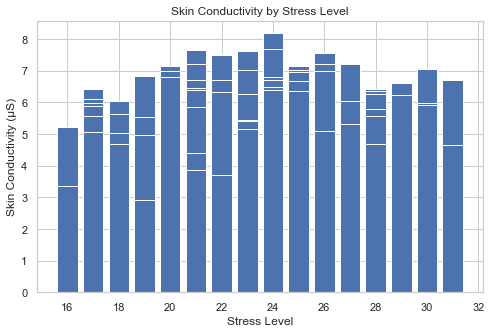

In [17]:
# Bar chart for Skin Conductivity by Stress Level
plt.figure(figsize=(8, 5))
plt.bar(df['Stress_Level'], df['Skin_Conductivity'])
plt.title('Skin Conductivity by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Skin Conductivity (µS)')
plt.show()

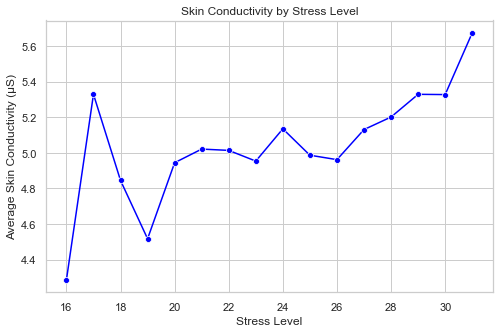

In [18]:
# Line chart for Skin Conductivity by Stress Level
plt.figure(figsize=(8, 5))
average_skin_conductivity = df.groupby('Stress_Level')['Skin_Conductivity'].mean().reset_index()
sns.lineplot(x='Stress_Level', y='Skin_Conductivity', data=average_skin_conductivity, marker='o', color='blue')
plt.title('Skin Conductivity by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Skin Conductivity (µS)')
plt.grid(True)
plt.show()

The graph shows the relationship between stress level and average skin conductivity. As the stress level increases, the average skin conductivity also tends to increase. This indicates that skin conductivity can be a potential biomarker for stress.

However, it's important to note that other factors, such as temperature and humidity, can also influence skin conductivity. Therefore, interpreting the results should be done in conjunction with other physiological measures and contextual information

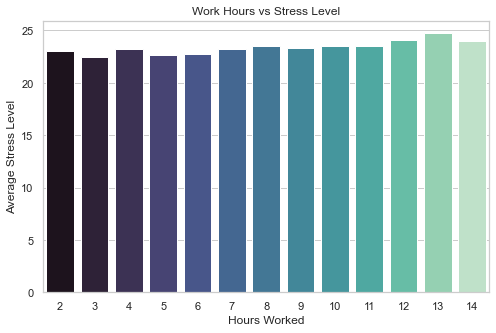

In [19]:
# Work Hours vs Stress Level
plt.figure(figsize=(8, 5))
sns.barplot(x='Hours_Worked', y='Stress_Level', data=df, ci=None, palette='mako')
plt.title('Work Hours vs Stress Level')
plt.xlabel('Hours Worked')
plt.ylabel('Average Stress Level')
plt.show()

The bar chart shows the relationship between the number of hours worked and the average stress level. As the number of hours worked increases, the average stress level also tends to increase. This suggests that longer working hours are generally associated with higher levels of stress.

However, it's important to note that this is a correlation, not necessarily causation. Other factors, such as work intensity, job satisfaction, and individual differences, can also contribute to stress levels.

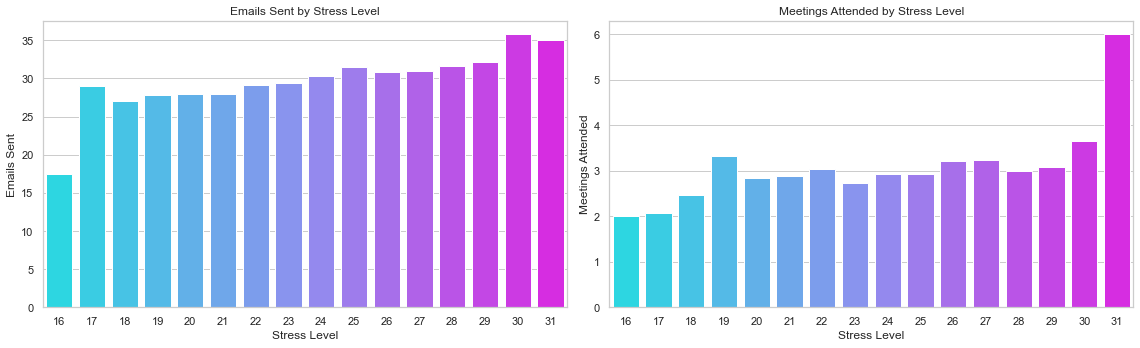

In [20]:
# Emails Sent and Meetings Attended vs Stress Level
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(x='Stress_Level', y='Emails_Sent', data=df, ax=axes[0], ci=None, palette='cool')
axes[0].set_title('Emails Sent by Stress Level')
axes[0].set_xlabel('Stress Level')
axes[0].set_ylabel('Emails Sent')

sns.barplot(x='Stress_Level', y='Meetings_Attended', data=df, ax=axes[1], ci=None, palette='cool')
axes[1].set_title('Meetings Attended by Stress Level')
axes[1].set_xlabel('Stress Level')
axes[1].set_ylabel('Meetings Attended')

plt.tight_layout()
plt.show()

The bar chart shows a positive correlation between stress level and the number of emails sent. As the stress level increases, the number of emails sent also tends to increase. This suggests that people tend to communicate more via email when they are stressed. However, it's important to note that this could be due to various reasons, such as seeking help, communicating concerns, or simply feeling overwhelmed.

For meetings attended, the bar chart shows the highest stress level for the highest number of meetings attended in a day.

<AxesSubplot:>

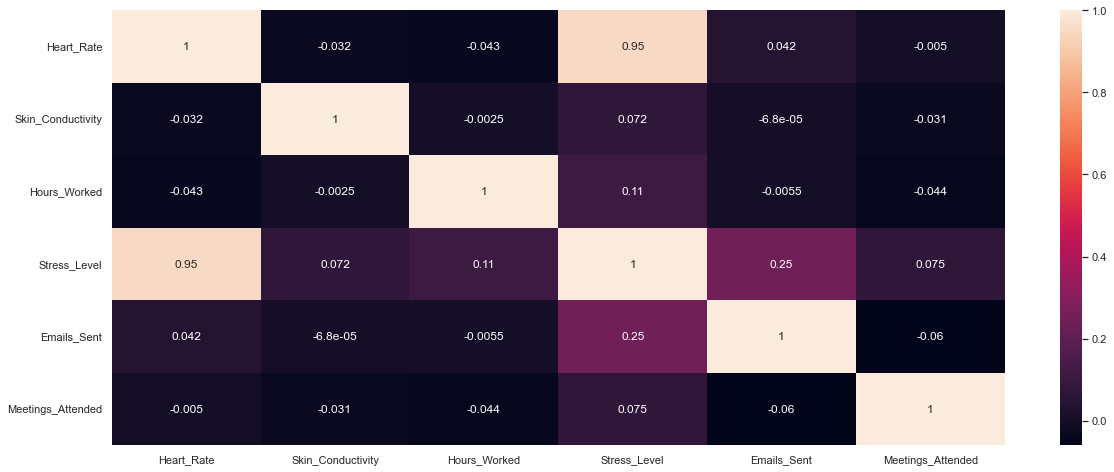

In [21]:
## Heat map showing correlations
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

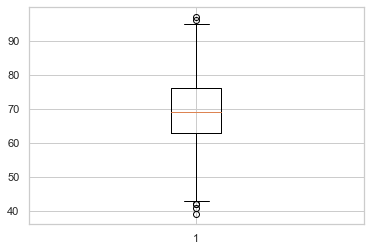

In [22]:
# Checking for outliers
plt.boxplot(df["Heart_Rate"])
plt.show()

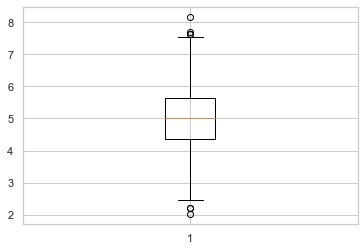

In [23]:
# Checking for outliers
plt.boxplot(df["Skin_Conductivity"])
plt.show()

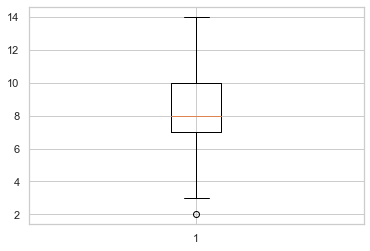

In [24]:
# Checking for outliers
plt.boxplot(df["Hours_Worked"])
plt.show()

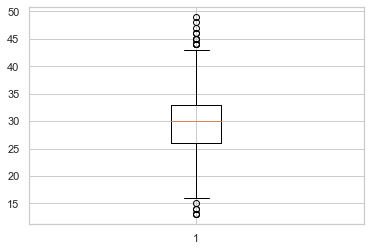

In [25]:
# Checking for outliers
plt.boxplot(df["Emails_Sent"])
plt.show()

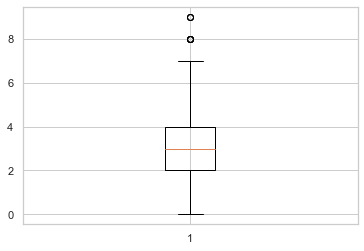

In [26]:
# Checking for outliers	
plt.boxplot(df["Meetings_Attended"])
plt.show()

### There are very few outliers in the dataset, No need of standardization

## Supervised Learning Regression

In [29]:
# Select your target variable and the features(y - Target variable and x - features)

y = df.pop("Stress_Level")
y = pd.DataFrame(y)
y

,Stress_Level
0,28
1,25
2,26
3,30
4,29
...,...
995,26
996,24
997,23
998,21


In [30]:
x = df
x

,Heart_Rate,Skin_Conductivity,Hours_Worked,Emails_Sent,Meetings_Attended
0,87,5.56,5,31,6
1,74,5.89,5,42,3
2,79,4.58,9,28,4
3,92,5.10,7,37,3
4,88,5.23,8,35,6
...,...,...,...,...,...
995,74,5.10,13,36,1
996,68,6.40,7,31,5
997,70,5.16,8,27,3
998,58,3.86,6,34,6


In [31]:
# Split your dataset to training and test sets

#splitting data with test size of 20%

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state = 50)

### Linear Regression

In [33]:
#build linear regression model

model = LinearRegression() 

In [34]:
#fitting the training data

model.fit(x_train,y_train) 

LinearRegression()

In [35]:
# Check for predicted value
predicted = model.predict(x_test)

In [36]:
# Assess your model performance on the test set using relevant evaluation metrics

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 0.08293926038865691
R squared 0.9869468702050831


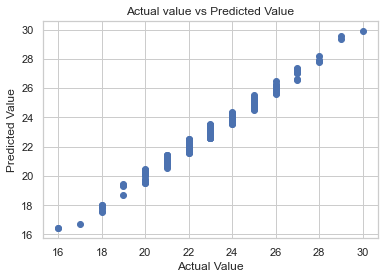

In [37]:
plt.scatter(y_test,predicted)
plt.title("Actual value vs Predicted Value")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

plt.show()

In [38]:
import pickle
with open ("Stress_Detection_LRmodel.pkl","wb") as file:
    pickle.dump(model,file)

### Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Random Forest Regression - MSE: {mse}, R²: {r2}")

Random Forest Regression - MSE: 0.23994700000000008, R²: 0.9622367100909274


### Support Vector Machine

In [42]:
# For regression tasks, you’ll use SVR from sklearn.svm.

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the SVM regressor
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svm_regressor.fit(x_train, y_train)

SVR()

In [43]:
# Make predictions on the test set
y_pred = svm_regressor.predict(x_test)

In [44]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.30
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.38


### Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Decision Tree Regression - MSE: {mse}, R²: {r2}")


Decision Tree Regression - MSE: 0.475, R²: 0.9252436466936051


### Gradient  Boosting Regression

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Gradient Boosting Regression - MSE: {mse}, R²: {r2}")


Gradient Boosting Regression - MSE: 0.14918620341657424, R²: 0.9765208073030545


### K-Nearest Neighbors Regression

In [50]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"K-Nearest Neighbors Regression - MSE: {mse}, R²: {r2}")


K-Nearest Neighbors Regression - MSE: 0.2523999999999999, R²: 0.9602768345799283


### Bayesian Ridge Regression

In [52]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Bayesian Ridge Regression - MSE: {mse}, R²: {r2}")


Bayesian Ridge Regression - MSE: 0.08295126949278994, R²: 0.9869449801907011
